In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
train_csv = pd.read_csv('train.csv',sep = ',')
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# count how many male/passenger there are
group_by_sex = train_csv['Sex']
sex_count = group_by_sex.value_counts()

sex_count

male      577
female    314
Name: Sex, dtype: int64

### how many male vs Female survived

#### male survived

In [6]:
idx1 = np.where((train_csv['Survived'] == 1) & (train_csv['Sex'] == 'male'))
male_sur = train_csv.iloc[idx1]

#### female survived

In [7]:
idx2 = np.where((train_csv['Survived'] == 1) & (train_csv['Sex'] == 'female'))
female_sur = train_csv.iloc[idx2]

% of the gender survived

In [8]:
male_sur_perc = round((len(male_sur)/sex_count['male']) * 100, 2)
female_sur_perc = round((len(female_sur)/sex_count['female']) * 100, 2)
print('male survived Perc: {} and female survived Perc: {}'.format(male_sur_perc, female_sur_perc))

male survived Perc: 18.89 and female survived Perc: 74.2


In [9]:
import matplotlib.pyplot as plt

In [10]:
total_survived = pd.Series([len(male_sur), len(female_sur)], index = ['male','female'])
total_survived.head()

male      109
female    233
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survivors Count'>

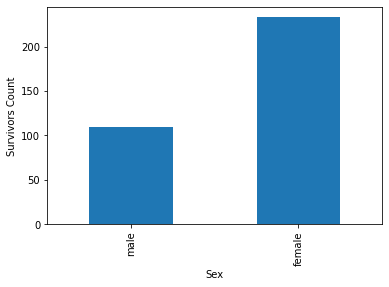

In [11]:
# plot
total_survived.plot(x = total_survived.index, kind = 'bar', xlabel = 'Sex', ylabel = 'Survivors Count')

#### female survivors base on class

In [28]:
f_sur_by_class = female_sur['Pclass'].value_counts()
f_sur_by_class.sort_values(ascending = False)

1    91
3    72
2    70
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Passenger Class', ylabel='# of Survivors'>

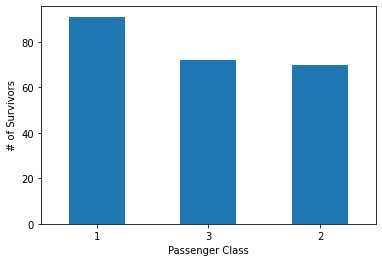

In [37]:
#  3 is first class, 1 is lowest
f_sur_by_class.plot(
    kind = 'bar',
    xlabel = 'Passenger Class',
    ylabel = '# of Survivors',
    rot = 0
)